In [ ]:

  
## for data
import json
import pandas as pd
import numpy as np
## for plotting
## for processing
import re
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
# Ensemble learning models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
# Model evaluation
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd



from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


import joblib 
## for bert language model
#import transformers
import spacy
from collections import Counter


import tensorflow as tf
import random
# from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import KFold
from nltk.stem import PorterStemmer
from string import punctuation
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
import time

%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False





#Save Classification report in a Dataframe for plotting 


def report_to_df(report, filename):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df_rep = pd.DataFrame(data = values, columns = header)
    joblib.dump(df_rep,prefix+filename+'report.Dataframe')



# Kink to drive
import joblib 
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
prefix = 'drive/MyDrive/Hisham_Ignacio/ICMS_ML/'


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.


Mounted at /content/drive


## Clean, cutoff for 250 and categroy 50 is out. 
The text is not preprocessed or tokinised. 

In [ ]:

## Tf-Idf (advanced variant of BoW)
#vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=total_dict, ngram_range=(1,2))

# plot histogram
def histo(df):
  fig, ax = plt.subplots(figsize=(25, 15))
  fig.suptitle("y", fontsize=12)
  df["Cat"].reset_index().groupby("Cat").count().sort_values(by= "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
  plt.show()


# remove under-represented categories
def cat_size(df, cat_size):
  if cat_size is not None:
    df_minimal=df.groupby(['Cat']).filter(lambda x: len(x) >= cat_size)
  return df_minimal


###### -- CLEANING and Vectorisation #####

from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stemmer = PorterStemmer()
    
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # filter out stop words
    tokens = [w for w in tokens if not w in stopwords]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) >= 1]
    # Stem the token
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens

def add_doc_to_vocab(docs, vocab):
    '''
    input:
        docs: a list of sentences (docs)
        vocab: a vocabulary dictionary
    output:
        return an updated vocabulary
    '''
    for doc in docs:
        tokens = clean_doc(doc)
        vocab.update(tokens)
    return vocab
        
def doc_to_line(doc, vocab):
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [token for token in tokens if token in vocab]
    line = ' '.join(tokens)
    return line

def clean_docs(docs, vocab):
    lines = []
    for doc in docs:
        line = doc_to_line(doc, vocab)
        lines.append(line)
    return lines

def create_tokenizer(sentences):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    return tokenizer


def prepare_ready(X_train, X_test, mode):
  print('train_x size: ', len(X_train))
  print('train_y size: ', len(y_train))
  print('test_x size: ', len(X_test))
  print('test_y size: ', len(y_test))

  # Instantiate a vocab object
  vocab = Counter()
  # Define a vocabulary for each fold
  vocab = add_doc_to_vocab(X_train, vocab)
  print('The number of vocab: ', len(vocab))

  # Clean the sentences
  X_train = clean_docs(X_train, vocab)
  X_test = clean_docs(X_test, vocab)

  # Define the tokenizer
  tokenizer = create_tokenizer(X_train)
  # encode data using the parsed mode ['freq', 'count', tfidf, etc]
  Xtrain = tokenizer.texts_to_matrix(X_train, mode=mode)
  Xtest = tokenizer.texts_to_matrix(X_test, mode=mode)
  #joblib.dump((Xtrain), prefix+mode+'Train.joblib')
  #joblib.dump((Xtest), prefix+mode+'Test.joblib')
  print('Saved vectorised splits to disk')
  print('Xtrain', prefix+mode+'Train.joblib')
  print('Xtest', prefix+mode+'Test.joblib')
  
  return Xtrain, Xtest
  ## Check vocabulary
  #vocab.items()
  # print(vocab)

def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    #remove if only two charecters
    text_big = re.sub(r'\W*\b\w{1,2}\b', '', text) 
          
    ## Tokenize (convert from string to list)
    lst_text = text_big.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
        #lst_text = ' '.join(c for c in lst_text if not c.isdigit())
     

    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]

       

    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
                 ## removing tags
        ## removing digits

    
           
    ## back to string from list
    text = " ".join(lst_text)
    return text

lst_stopwords = nltk.corpus.stopwords.words("english")
for x in ('x', 'mm', 'cm', 'ref', 'wb', 'xx', 'per', 'm'):
  lst_stopwords.append(x)


# Function to clean text data

def clean_text_data(df):

    # Separate data
    desc_lower = df['comment_list']
    


    # Remove text before "|" character
    desc_split = desc_lower.str.split("|")
    desc_strip = desc_split.apply(lambda x: x[1] if len(x) > 1 else x[0])
    # Removing digits and words containing digits
    desc_nodigits = desc_strip.apply(lambda x: re.sub("\w*\d\w*", "", x))
    # Removing punctuation
    desc_nopunc = desc_nodigits.apply(lambda x: re.sub(r"[^\w\s]", "", x))
    # Removing additional whitespace
    desc_clean = desc_nopunc.apply(lambda x: re.sub(' +', ' ', x))
    
    
    # Lemmatisation and stopword removal
    # Load spacy
    nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner'])
    lemmatized = desc_clean.apply(lambda x: " ".\
                                  join([token.lemma_ for token in list(nlp(x)) if (token.is_stop == False)]))
    
    return lemmatized

In [ ]:
df= joblib.load(prefix+'df_clean.joblib')

In [ ]:
df = joblib.load(prefix+'ICMS_dataset_revised.joblib') 
Cat = {i:x for i,x in enumerate(df.ICMS.astype('category').cat.categories)}
#y = df.Cat.astype('int')

print ("size before")
print (df.shape)

 # Remove repeated rows
df.drop_duplicates(inplace = True)
   
    # For rows with identical reviews - retain only first
df.drop_duplicates(subset = ['Description'], keep = 'first', inplace = True)

    # Create mask
missing_description = df.Description.isna()
df = df[~missing_description]
    
print ("size after")
print (df.shape)


#Generate the category codes from the ICMS codes
df['Cat'] = df.ICMS.astype('category').cat.codes
#df.drop_duplicates()


df["comment_list"] = df["Description"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
y = df.Cat.astype('int')

df["comment_list_new"] = clean_text_data(df)

df.head()

size before
(123924, 2)
size after
(53320, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Description,ICMS,Cat,comment_list,comment_list_new
0,Filter Drains - Diameter <300mm,1.06.020,31,filter drain diameter 300mm,filter drain diameter
1,Filter Drains - Diameter >=300 but <450mm,1.06.020,31,filter drain diameter 300 450mm,filter drain diameter
2,Filter Drains - Diameter >=450mm,1.06.020,31,filter drain diameter 450mm,filter drain diameter
3,Filter Drains - Sub-base material,1.06.020,31,filter drain subbase material,filter drain subbase material
4,Filter Drains - Lightweight aggregate infill,1.06.020,31,filter drain lightweight aggregate infill,filter drain lightweight aggregate infill


In [ ]:
df= joblib.load(prefix+'df_clean.joblib')

['drive/MyDrive/Hisham_Ignacio/ICMS_ML/df_clean.joblib']

In [ ]:
df.shape

(53320, 5)

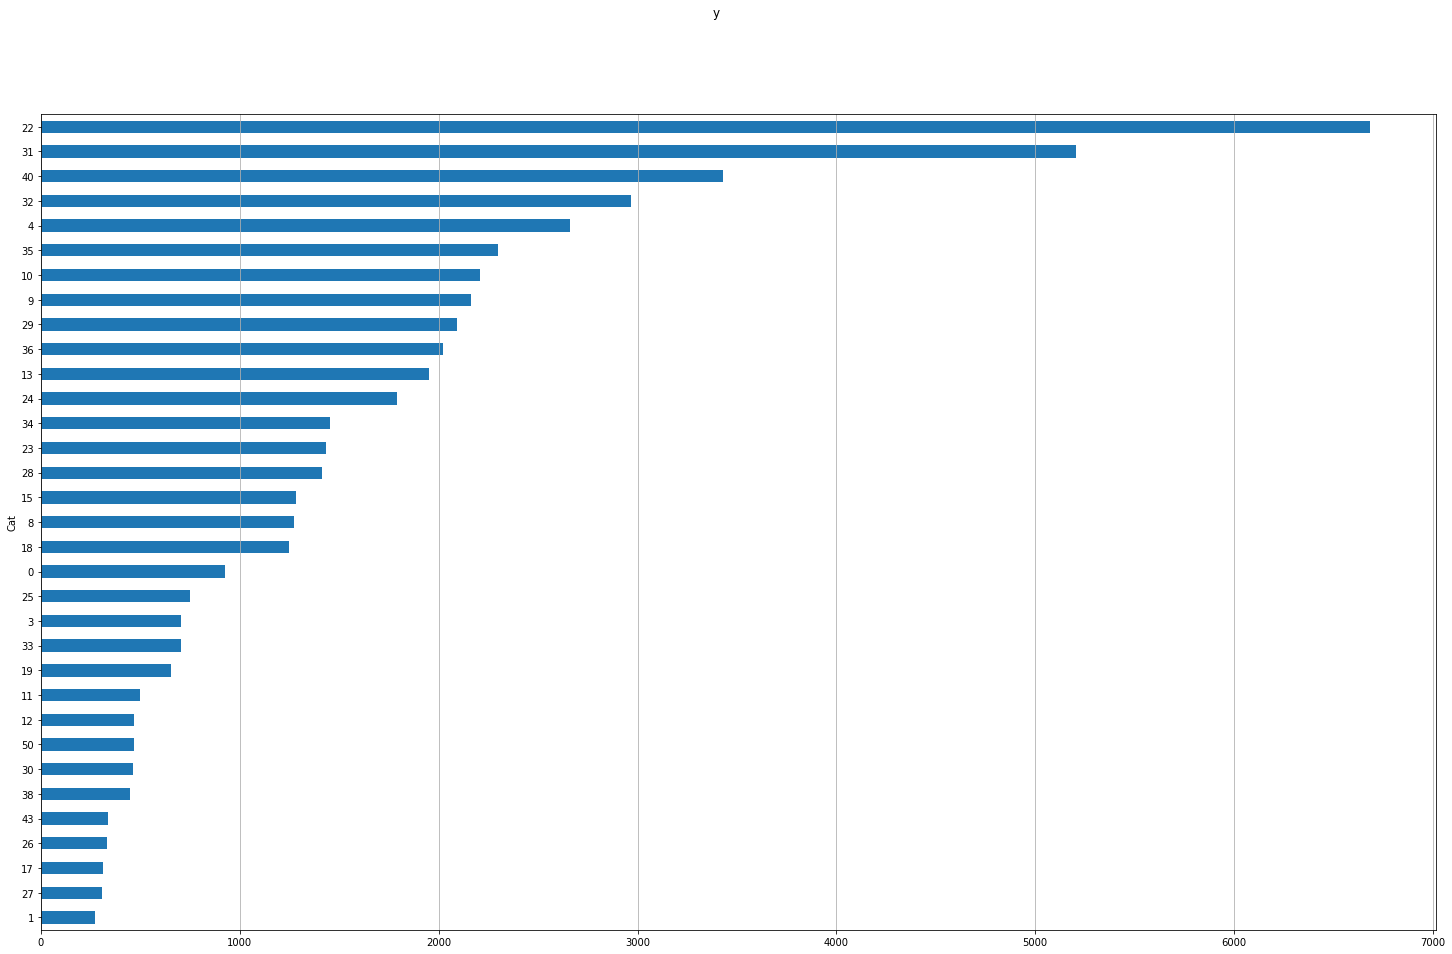

,Description,ICMS,Cat,comment_list,comment_list_new
0,Filter Drains - Diameter <300mm,1.06.020,31,filter drain diameter 300mm,filter drain diameter
1,Filter Drains - Diameter >=300 but <450mm,1.06.020,31,filter drain diameter 300 450mm,filter drain diameter
2,Filter Drains - Diameter >=450mm,1.06.020,31,filter drain diameter 450mm,filter drain diameter
3,Filter Drains - Sub-base material,1.06.020,31,filter drain subbase material,filter drain subbase material
4,Filter Drains - Lightweight aggregate infill,1.06.020,31,filter drain lightweight aggregate infill,filter drain lightweight aggregate infill
...,...,...,...,...,...
123912,Sheet piled retaining wall based on AZ17 secti...,1.02.050,10,sheet piled retaining wall based az17 section ...,sheet pile retain wall base section sheet pile...
123913,Extra over for steel sheet piling work at nigh...,1.02.050,10,extra steel sheet piling work night driving st...,extra steel sheet pile work night drive steel ...
123918,Add Hockey stick - Erection (cleansed),1.04.050,23,add hockey stick erection cleansed,add hockey stick erection cleanse
123920,Assistant Engineering Manager,1.08.010,35,assistant engineering manager,assistant engineering manager


In [ ]:
df=cat_size(df, 250)
histo(df)


index_names = df[ df['Cat'] == 50 ].index
  
# drop these row indexes
# from dataFrame
df.drop(index_names, inplace = True)
  
df

In [ ]:
#df.drop(columns = ['ICMS'], inplace = True)
y = df.Cat.astype('int')
X=df["comment_list_new"]
#X=df["Description"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, X.shape, y.shape)

(40595,) (10149,) (40595,) (10149,) (50744,) (50744,)


In [ ]:
X_train=X_train.to_frame()
X_test=X_test.to_frame()


In [ ]:


X_train = list(X_train.comment_list_new)
X_test = list(X_test.comment_list_new)

In [ ]:
X_train, X_test=prepare_ready(X_train, X_test, 'count')

train_x size:  40595
train_y size:  40595
test_x size:  10149
test_y size:  10149
The number of vocab:  5908
Saved vectorised splits to disk
Xtrain drive/MyDrive/Hisham_Ignacio/ICMS_ML/countTrain.joblib
Xtest drive/MyDrive/Hisham_Ignacio/ICMS_ML/countTest.joblib


In [ ]:
X_train.shape

(40595, 1)

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, 
                                             patience=10, verbose=2, 
                                             mode='auto', restore_best_weights=True)

train_x size:  40595
train_y size:  40595
test_x size:  10149
test_y size:  10149
Epoch 1/30
812/812 - 3s - loss: 1.3108 - accuracy: 0.6769 - val_loss: 0.5197 - val_accuracy: 0.8700 - 3s/epoch - 4ms/step
Epoch 2/30
812/812 - 2s - loss: 0.6136 - accuracy: 0.8466 - val_loss: 0.4095 - val_accuracy: 0.8960 - 2s/epoch - 3ms/step
Epoch 3/30
812/812 - 2s - loss: 0.4731 - accuracy: 0.8804 - val_loss: 0.3697 - val_accuracy: 0.9080 - 2s/epoch - 3ms/step
Epoch 4/30
812/812 - 2s - loss: 0.4057 - accuracy: 0.8985 - val_loss: 0.3527 - val_accuracy: 0.9134 - 2s/epoch - 3ms/step
Epoch 5/30
812/812 - 2s - loss: 0.3481 - accuracy: 0.9102 - val_loss: 0.3483 - val_accuracy: 0.9157 - 2s/epoch - 3ms/step
Epoch 6/30
812/812 - 2s - loss: 0.3095 - accuracy: 0.9191 - val_loss: 0.3478 - val_accuracy: 0.9188 - 2s/epoch - 3ms/step
Epoch 7/30
812/812 - 2s - loss: 0.2836 - accuracy: 0.9267 - val_loss: 0.3524 - val_accuracy: 0.9186 - 2s/epoch - 3ms/step
Epoch 8/30
812/812 - 2s - loss: 0.2632 - accuracy: 0.9318 - val_

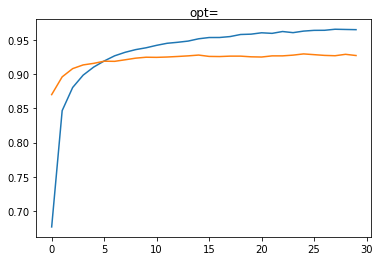

In [ ]:
#########################
# The Dense Sequential Model MLP #
#########################



def create_tokenizer(sentences):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    return tokenizer

def train_mlp_3(train_x, train_y, test_x, test_y, batch_size = 50, epochs = 30, verbose =2):
    
    n_words = train_x.shape[1]
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=300, activation='relu', input_shape=(n_words,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense( units=50, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense( units=44, activation='softmax')
    ])
    
    model.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    history= model.fit(train_x, train_y, batch_size, epochs, verbose, callbacks = [callbacks], validation_data=(test_x, test_y))

    plt.plot(history.history['accuracy'], label='train'); plt.plot(history.history['val_accuracy'], label='test'); plt.title('opt=', pad=-80)
    return model

# Separate the sentences and the labels for training and testing
train_x = list(X_train.comment_list_new)
train_y = y_train
print('train_x size: ', len(train_x))
print('train_y size: ', len(train_y))

test_x = list(X_test.comment_list_new)
test_y = y_test
print('test_x size: ', len(test_x))
print('test_y size: ', len(test_y))


mode='count'
    
# Define the tokenizer
tokenizer = create_tokenizer(train_x)
    
# encode data using freq mode
Xtrain = tokenizer.texts_to_matrix(train_x, mode=mode)
Xtest = tokenizer.texts_to_matrix(test_x, mode=mode)

# train the model
model = train_mlp_3(Xtrain, train_y, Xtest, test_y, epochs = 30)

# evaluate the model
loss, acc = model.evaluate(Xtest, test_y, verbose=0)
print('Test Accuracy: {}'.format(acc*100))

# get the ground truth of your data. 
test_labels=test_y 

# predict the probability distribution of the data
predictions=model.predict(Xtest, steps=51, verbose=1)

# get the class with highest probability for each sample
y_pred = np.argmax(predictions, axis=-1)
print(y_pred)
# get the classification report


C_report=classification_report(test_labels, y_pred)
print(C_report)

#Pandas format of the report
report_to_df(C_report, "BoW-MLP-300"+mode)
#Save C_report 


## Change name for reference
text_file = open(prefix+"BoW-MLP-300"+mode, "w")
n = text_file.write(C_report)
text_file.close()




In [ ]:
Xtest.shape

(10149, 16919)

In [ ]:
clf = RandomForestClassifier(warm_start=True, max_features=30,
            random_state=127,
            n_estimators=600,
            n_jobs=-1)
clf.fit(Xtrain, train_y)

acc = clf.score(Xtest, y_test)
print('Test Accuracy: {}'.format(acc*100))

y_pred = clf.predict(Xtest)
#text_file = open(prefix+"CR_RM_200", "w")
#n = text_file.write(C_report)
#text_file.close()

    # predict the probability distribution of the data
test_labels=test_y
#predictions=model.predict(test_x, steps=51, verbose=1)

# get the class with highest probability for each sample

print(y_pred)
    # get the classification report


C_report=classification_report(test_labels, y_pred)
print(C_report)


    #Pandas format of the report
#report_to_df(C_report, "RF600-count")
#Save C_report 


        ## Change name for reference
#text_file = open(perfix3+ 'RF600-count.txt', "w")
#n = text_file.write(C_report)
#text_file.close()    





Test Accuracy: 92.62981574539364
[ 4 35 22 ... 22  4 40]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       186
           1       1.00      0.74      0.85        54
           3       0.97      0.87      0.91       141
           4       0.94      0.94      0.94       532
           8       0.88      0.85      0.86       254
           9       0.95      0.95      0.95       432
          10       0.96      0.96      0.96       442
          11       0.95      0.96      0.95        99
          12       0.96      0.90      0.93        94
          13       0.92      0.94      0.93       390
          15       0.93      0.90      0.91       256
          17       0.95      0.90      0.93        63
          18       0.91      0.91      0.91       249
          19       0.92      0.82      0.87       131
          22       0.99      0.99      0.99      1336
          23       0.95      0.92      0.93       287
          24       0.94 

In [ ]:
report_to_df(C_report, "BoW-MLP-300"+mode)


# Word2Vec with TCN

In [ ]:
word2vec=joblib.load(prefix+'word2vec-google-news-300.joblib')

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.layers import Input, Embedding, Conv1D, Dropout, MaxPool1D, Flatten, Dense, Bidirectional, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define a function to compute the max length of sequence
def max_length(sequences):
    '''
    input:
        sequences: a 2D list of integer sequences
    output:
        max_length: the max length of the sequences
    '''
    max_length = 0
    for i, seq in enumerate(sequences):
        length = len(seq)
        if max_length < length:
            max_length = length
    return max_length





Checking how many words word2vec finds

In [ ]:
def training_words_in_word2vector(word_to_vec_map, word_to_index):
    '''
    input:
        word_to_vec_map: a word2vec GoogleNews-vectors-negative300.bin model loaded using gensim.models
        word_to_index: word to index mapping from training set
    '''
    
    vocab_size = len(word_to_index) + 1
    count = 0
    # Set each row "idx" of the embedding matrix to be 
    # the word vector representation of the idx'th word of the vocabulary
    for word, idx in word_to_index.items():
        if word in word_to_vec_map:
            count+=1
            
    return print('Found {} words present from {} training vocabulary in the set of pre-trained word vector'.format(count, vocab_size))

In [ ]:
oov_tok = "<UNK>"
# Separate the sentences and the labels
sentences, labels = list(X), list(y)

# Cleaning and Tokenization
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
training_words_in_word2vector(word2vec, word_index)

Found 4535 words present from 7321 training vocabulary in the set of pre-trained word vector


In [ ]:
emb_mean = word2vec.vectors.mean()
emb_std = word2vec.vectors.std()

## Defning embedding layer

In [ ]:
from tensorflow.keras.layers import Embedding

def pretrained_embedding_matrix(word_to_vec_map, word_to_index, emb_mean, emb_std):
    '''
    input:
        word_to_vec_map: a word2vec GoogleNews-vectors-negative300.bin model loaded using gensim.models
        word_to_index: word to index mapping from training set
    '''
    np.random.seed(2021)
    
    # adding 1 to fit Keras embedding (requirement)
    vocab_size = len(word_to_index) + 1
    # define dimensionality of your pre-trained word vectors (= 300)
    emb_dim = word_to_vec_map.word_vec('handsome').shape[0]
    
    # initialize the matrix with generic normal distribution values
    embed_matrix = np.random.normal(emb_mean, emb_std, (vocab_size, emb_dim))
    
    # Set each row "idx" of the embedding matrix to be 
    # the word vector representation of the idx'th word of the vocabulary
    for word, idx in word_to_index.items():
        if word in word_to_vec_map:
            embed_matrix[idx] = word_to_vec_map.get_vector(word)
            
    return embed_matrix

In [ ]:
w_2_i = {'<UNK>': 1, 'handsome': 2, 'cool': 3, 'shit': 4 }
em_matrix = pretrained_embedding_matrix(word2vec, w_2_i, emb_mean, emb_std)
em_matrix

array([[ 0.19468211,  0.08648376, -0.05924511, ..., -0.16683994,
        -0.09975549, -0.08595189],
       [-0.13509196, -0.07441947,  0.15388953, ..., -0.05400787,
        -0.13156594, -0.05996158],
       [ 0.11376953,  0.1796875 , -0.265625  , ..., -0.21875   ,
        -0.03930664,  0.20996094],
       [ 0.1640625 ,  0.1875    , -0.04101562, ...,  0.10888672,
        -0.01019287,  0.02075195],
       [ 0.10888672, -0.16699219,  0.08984375, ..., -0.19628906,
        -0.23144531,  0.04614258]])

In [ ]:
pip install keras-tcn

## the model 

In [ ]:
from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import concatenate, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.models import Model

def define_model_2(kernel_size = 3, activation='relu', input_dim = None, 
                   output_dim=300, max_length = None, emb_matrix = None):
    
    inp = Input( shape=(max_length,))
    x = Embedding(input_dim=input_dim, 
                  output_dim=output_dim, 
                  input_length=max_length,
                  # Assign the embedding weight with word2vec embedding marix
                  weights = [emb_matrix],
                  # Set the weight to be not trainable (static)
                  trainable = False)(inp)
    
    x = SpatialDropout1D(0.1)(x)
    
    x = TCN(128,dilations = [1, 2, 4], return_sequences=True, activation = activation, name = 'tcn1')(x)
    x = TCN(64,dilations = [1, 2, 4], return_sequences=True, activation = activation, name = 'tcn2')(x)
    
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    
    conc = concatenate([avg_pool, max_pool])
    conc = Dense(16, activation="relu")(conc)
    conc = Dropout(0.1)(conc)
    outp = Dense(51, activation="softmax")(conc)    

    model = Model(inputs=inp, outputs=outp)
    model.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [ ]:
model_0 = define_model_2( input_dim=1000, max_length=100, emb_matrix=np.random.rand(1000, 300))
model_0.summary()

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, 
                                             patience=20, verbose=2, 
                                             mode='auto', restore_best_weights=True)

In [ ]:
# Parameter Initialization
trunc_type='post'
padding_type='post'
oov_tok = "<UNK>"
activations = ['relu']
filters = 100
#kernel_sizes = [1, 2, 3, 4, 5, 6]
kernel_sizes = [3]
emb_mean = emb_mean
emb_std = emb_std

columns = ['Activation', 'Filters', 'Acc']
record2 = pd.DataFrame(columns = columns)

train_y = y_train
test_y = y_test

exp = 0

for activation in activations:

    for kernel_size in kernel_sizes:
        
        exp+=1
        print('-------------------------------------------')
        print('Training {}: {} activation, {} kernel size.'.format(exp, activation, kernel_size))
        print('-------------------------------------------')
        
        # encode data using
        # Cleaning and Tokenization
        tokenizer = Tokenizer(oov_token=oov_tok)
        tokenizer.fit_on_texts(X_train)

        # Turn the text into sequence
        training_sequences = tokenizer.texts_to_sequences(X_train.comment_list_new)
        test_sequences = tokenizer.texts_to_sequences(X_test.comment_list_new)

        max_len = max_length(training_sequences)

        # Pad the sequence to have the same size
        Xtrain = pad_sequences(training_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)
        Xtest = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

        word_index = tokenizer.word_index
        vocab_size = len(word_index)+1

        emb_matrix = pretrained_embedding_matrix(word2vec, word_index, emb_mean, emb_std)

        # Define the input shape
        model = define_model_2(kernel_size, activation, input_dim=vocab_size, 
                             max_length=max_len, emb_matrix=emb_matrix)

        # Train the model and initialize test accuracy with 0
        acc = 0
        while(acc<0.6):

            model.fit(Xtrain, train_y, batch_size=50, epochs=50, verbose=1, 
                      callbacks=[callbacks], validation_data=(Xtest, test_y))

            # evaluate the model
            loss, acc = model.evaluate(Xtest, test_y, verbose=0)
            print('Test Accuracy: {}'.format(acc*100))

            if (acc<0.6):
                print('The model suffered from local minimum. Retrain the model!')
                model = define_model_2(kernel_size, activation, input_dim=vocab_size, 
                                       max_length=max_len, emb_matrix=emb_matrix)
            else:
                print('Done!')

        parameters = [activation, kernel_size]
        entries = parameters + [acc]

        temp = pd.DataFrame([entries], columns=columns)
        record2 = record2.append(temp, ignore_index=True)
        print()
        print(record2)
        print()

-------------------------------------------
Training 1: relu activation, 3 kernel size.
-------------------------------------------
Epoch 1/50
820/820 [==============================] - 28s 16ms/step - loss: 3.1354 - accuracy: 0.1602 - val_loss: 2.9664 - val_accuracy: 0.1895
Epoch 2/50
820/820 [==============================] - 11s 14ms/step - loss: 2.9715 - accuracy: 0.1883 - val_loss: 2.9120 - val_accuracy: 0.1954
Epoch 3/50
820/820 [==============================] - 11s 14ms/step - loss: 2.9427 - accuracy: 0.1920 - val_loss: 2.9105 - val_accuracy: 0.1925
Epoch 4/50
820/820 [==============================] - 11s 14ms/step - loss: 2.9336 - accuracy: 0.1932 - val_loss: 2.8993 - val_accuracy: 0.1940
Epoch 5/50
820/820 [==============================] - 11s 14ms/step - loss: 2.9250 - accuracy: 0.1945 - val_loss: 2.9000 - val_accuracy: 0.1971
Epoch 6/50
820/820 [==============================] - 11s 14ms/step - loss: 2.9186 - accuracy: 0.1968 - val_loss: 2.8939 - val_accuracy: 0.1966
Epoc

# Random Forest Same as above

In [ ]:
from sklearn.ensemble import RandomForestClassifier

mode = 'count'
filename = 'RF'

def create_tokenizer(sentences):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    return tokenizer



# Separate the sentences and the labels for training and testing
train_x = list(X_train.Description)
train_y = y_train
print('train_x size: ', len(train_x))
print('train_y size: ', len(train_y))

test_x = list(X_test.Description)
test_y = y_test
print('test_x size: ', len(test_x))
print('test_y size: ', len(test_y))



    
# Define the tokenizer
tokenizer = create_tokenizer(train_x)
    
# encode data using freq mode
Xtrain = tokenizer.texts_to_matrix(train_x, mode=mode)
Xtest = tokenizer.texts_to_matrix(test_x, mode=mode)




clf = RandomForestClassifier(warm_start=True, max_features='log2',
            random_state=127,
            n_estimators=200,
            n_jobs=-1)
clf.fit(Xtrain, y_train)



y_pred = clf.predict(Xtest)
print (clf.score(Xtest, test_y, sample_weight=None))
print(classification_report(y_test,y_pred))


C_report=classification_report(test_y,y_pred)
text_file = open(prefix+mode+filename, "w")
n = text_file.write(C_report)
text_file.close()


#Pandas format of the report
report_to_df(C_report, mode+filename)
#Save C_report 






In [ ]:
report_to_df(C_report, mode+filename)

# Baseline 
Multinomial NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mode = 'count'
filename = 'NB'

def create_tokenizer(sentences):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    return tokenizer



# Separate the sentences and the labels for training and testing
train_x = list(X_train.Description)
train_y = y_train
print('train_x size: ', len(train_x))
print('train_y size: ', len(train_y))

test_x = list(X_test.Description)
test_y = y_test
print('test_x size: ', len(test_x))
print('test_y size: ', len(test_y))



    
# Define the tokenizer
tokenizer = create_tokenizer(train_x)
    
# encode data using freq mode
Xtrain = tokenizer.texts_to_matrix(train_x, mode=mode)
Xtest = tokenizer.texts_to_matrix(test_x, mode=mode)



clfNB = naive_bayes.MultinomialNB()
clfNB.fit(Xtrain, train_y)
## test
predicted = clfNB.predict(Xtest)
predicted_prob = clfNB.predict_proba(Xtest)



y_pred = clfNB.predict(Xtest)
print (clfNB.score(Xtest, test_y, sample_weight=None))
print(classification_report(y_test,y_pred))


C_report=classification_report(test_y,y_pred)
text_file = open(prefix+mode+filename, "w")
n = text_file.write(C_report)
text_file.close()


#Pandas format of the report
report_to_df(C_report, mode+filename)
#Save C_report 



train_x size:  40968
train_y size:  40968
test_x size:  10242
test_y size:  10242
0.850224565514548
              precision    recall  f1-score   support

           0       0.86      0.61      0.71       186
           1       0.97      0.67      0.79        54
           3       0.88      0.74      0.80       141
           4       0.81      0.89      0.85       532
           8       0.69      0.79      0.74       254
           9       0.83      0.85      0.84       432
          10       0.82      0.89      0.85       442
          11       0.91      0.86      0.89        99
          12       0.96      0.76      0.85        94
          13       0.82      0.93      0.87       391
          15       0.79      0.85      0.82       256
          17       0.94      0.73      0.82        63
          18       0.82      0.91      0.86       249
          19       0.89      0.65      0.75       131
          22       0.96      0.93      0.95      1336
          23       0.79      0.90  

# Extra: Create Report manually (if you like)

In [ ]:
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report
from  sklearn.metrics import precision_recall_fscore_support

np.random.seed(0)

y_true = np.array([0]*400 + [1]*600)
y_pred = np.random.randint(2, size=1000)

def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)
    
    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)
    
    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total
    
    class_report_df['avg / total'] = avg

    return class_report_df.T


    header = ['Class Name']+[x for x in report[0] if x!='']


In [ ]:
df_class_report = pandas_classification_report(y_true=y_test, y_pred=y_pred)
print(df_class_report)

             precision    recall  f1-score  support
0             0.927273  0.822581  0.871795    186.0
1             0.972973  0.666667  0.791209     54.0
2             0.967742  0.851064  0.905660    141.0
3             0.926966  0.930451  0.928705    532.0
4             0.867769  0.826772  0.846774    254.0
5             0.967213  0.956019  0.961583    432.0
6             0.959459  0.963801  0.961625    442.0
7             0.921569  0.949495  0.935323     99.0
8             0.966667  0.925532  0.945652     94.0
9             0.880668  0.943734  0.911111    391.0
10            0.915058  0.925781  0.920388    256.0
11            0.921875  0.936508  0.929134     63.0
12            0.901575  0.919679  0.910537    249.0
13            0.880342  0.786260  0.830645    131.0
14            0.983558  0.985030  0.984293   1336.0
15            0.942373  0.968641  0.955326    287.0
16            0.912429  0.902235  0.907303    358.0
17            0.951389  0.913333  0.931973    150.0
18          

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2022-04-21 16:19:50--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-04-21 16:19:50--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-04-21 16:19:50--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip -q glove.6B.zip

In [ ]:
import numpy as np

In [ ]:
word_vectors = dict()

# load the whole embedding into memory
f = open('glove.6B.300d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_vectors[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(word_vectors))

Loaded 400000 word vectors.


In [ ]:
num_tokens = len(voc) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

NameError: ignored